In [3]:
import xarray as xr
import numpy as np
import pandas as pd

In [4]:
local_path = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/Curnagl/ERA5_1990_2m_dewpoint_temperature.nc'

dew_point_xr = xr.open_dataset(local_path)
dew_point_xr

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 2920)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-12-31T21:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
# import 1st track

#head = ['lon_east', 'lon_west', 'lat_south', 'lat_north']
track_1 = pd.read_csv('tc_irad_tracks/tc_irad_1.txt')
#track_1.columns = head

# import all tracks

for i in range(0,4):
    locals()['track_' + str(i+1)] = pd.read_csv('tc_irad_tracks/tc_irad_' + str(i+1) + '.txt')
    

In [10]:
# slice the time dimension

dates = pd.read_csv('storms_start_end.csv', sep=',')

'''
start_first = dates['start_date'][0]
end_first = dates['end_date'][0]
'''
for i in range(0,4):
    start_temp = dates['start_date'][i]
    end_temp = dates['end_date'][i]

    # Create a new dataset for each iteration
    new_dataset = xr.Dataset({
        'd2m': dew_point_xr['d2m'],
        # Add other variables as needed
    })

    # Optionally, you can update the time dimension for the new dataset
    new_dataset = new_dataset.sel(time=slice(start_temp, end_temp))

    # Dynamically name the dataset variable
    locals()[f"dew_point_xr_{i}"] = new_dataset

'''
dew_point_xr = dew_point_xr.sel(time=slice(start_first, end_first))
dew_point_xr
'''

'\ndew_point_xr = dew_point_xr.sel(time=slice(start_first, end_first))\ndew_point_xr\n'

In [7]:
dew_point_xr_0

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 62)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00
Data variables:
    dew_point  (time, latitude, longitude) float32 ...

In [5]:
# create new pd dataframe
'''
first_slice = track_1.iloc[0]

test_dp     = dew_point_xr.sel(longitude=slice(first_slice['lon_east'], first_slice['lon_west']), latitude=slice(first_slice['lat_north'], first_slice['lat_south']))
test_dp'''


<xarray.Dataset>
Dimensions:    (longitude: 32, latitude: 32, time: 62)
Coordinates:
  * longitude  (longitude) float32 285.0 285.2 285.5 285.8 ... 292.2 292.5 292.8
  * latitude   (latitude) float32 45.5 45.25 45.0 44.75 ... 38.25 38.0 37.75
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

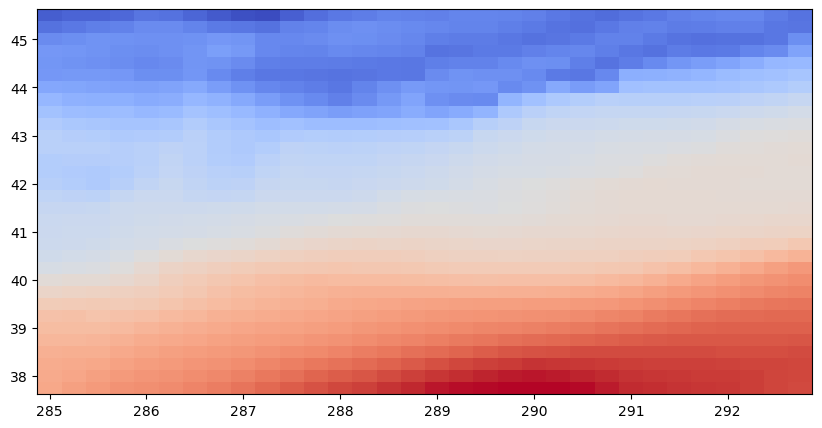

In [6]:
# plot the first slice with matplotlib
'''
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.pcolormesh(test_dp.longitude, test_dp.latitude, test_dp.d2m[0,:,:], cmap='coolwarm')'''

In [7]:
# check if it's correct
'''
lon_test = np.asanyarray(dew_point_xr.longitude[:])
lat_test = np.asanyarray(dew_point_xr.latitude[:])


closest_lon_w =np.abs(lon_test - first_slice['lon_west']).argmin()
closest_lon_e = np.abs(lon_test - first_slice['lon_east']).argmin()
closest_lat_s = np.abs(lat_test - first_slice['lat_south']).argmin()
closest_lat_n = np.abs(lat_test - first_slice['lat_north']).argmin()

lon_test[closest_lon_w]
lat_test[closest_lat_s]
'''
# works

37.75

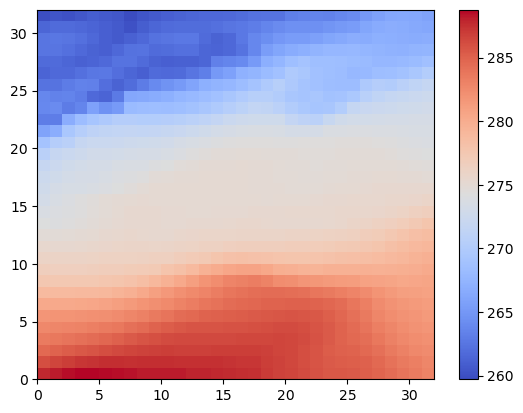

In [8]:
#slice with new boundaries
'''
plt.pcolormesh(np.flipud(dew_point_xr['d2m'][0,176:208,1157:1189]), cmap='coolwarm')
plt.colorbar()'''

In [9]:
lat_test[208]

38.0

In [37]:
# iterate through each time step

var_out = []
'''
for i in range(0, len(track_1)):
    lon_e_temp, lon_w_temp, lat_s_temp, lat_n_temp = track_1.iloc[i]

    lon_test = np.asanyarray(dew_point_xr.longitude[:])
    lat_test = np.asanyarray(dew_point_xr.latitude[:])

    closest_lon_w =np.abs(lon_test - lon_w_temp).argmin()
    closest_lon_e = np.abs(lon_test - lon_e_temp).argmin()
    closest_lat_s = np.abs(lat_test - lat_s_temp).argmin()
    closest_lat_n = np.abs(lat_test - lat_n_temp).argmin()

    temp_ds = np.asarray(dew_point_xr['d2m'])

    var_out.append(temp_ds[i,closest_lat_n:closest_lat_s,closest_lon_e:closest_lon_w])
'''
var_out
for j in range (0,4):
    track_temp = pd.read_csv(f'tc_irad_tracks/tc_irad_{j+1}.txt')
    dew_point_temp = locals()[f"dew_point_xr_{j}"]
    var_out_temp = []
    for i in range(0, len(track_temp)):
        lon_e_temp, lon_w_temp, lat_s_temp, lat_n_temp = track_temp.iloc[i]

        lon_test = np.asanyarray(dew_point_temp.longitude[:])
        lat_test = np.asanyarray(dew_point_temp.latitude[:])

        closest_lon_w =np.abs(lon_test - lon_w_temp).argmin()
        closest_lon_e = np.abs(lon_test - lon_e_temp).argmin()
        closest_lat_s = np.abs(lat_test - lat_s_temp).argmin()
        closest_lat_n = np.abs(lat_test - lat_n_temp).argmin()

        # Use .roll to handle the 0°/360° boundary

        roll_shift = {'longitude': closest_lon_e, 'longitude': closest_lon_w}
        dew_point_temp_rolled = dew_point_temp.roll(roll_shift, roll_coords=True)
        # Slice the dataset based on the rolled longitudes and latitudes
        temp_ds = dew_point_temp_rolled['d2m'].isel(time=i, latitude=slice(closest_lat_n, closest_lat_s),
                                                    longitude=slice(closest_lon_e, closest_lon_w)).values

        #temp_ds = np.asarray(dew_point_temp['d2m'])

        #var_out_temp.append(temp_ds[i,closest_lat_n:closest_lat_s,closest_lon_e:closest_lon_w])
        var_out_temp.append(temp_ds)

    locals()[f"var_out_{j}"] = var_out_temp


In [42]:
# test

for j in range(0, 4):
    track_temp = pd.read_csv(f'tc_irad_tracks/tc_irad_{j+1}.txt')
    dew_point_temp = locals()[f"dew_point_xr_{j}"]
    var_out_temp = []

    for i in range(0, len(track_temp)):
        lon_e_temp, lon_w_temp, lat_s_temp, lat_n_temp = track_temp.iloc[i]

        lon_test = np.asanyarray(dew_point_temp.longitude[:])
        lat_test = np.asanyarray(dew_point_temp.latitude[:])

        closest_lon_w = np.abs(lon_test - lon_w_temp).argmin()
        closest_lon_e = np.abs(lon_test - lon_e_temp).argmin()
        closest_lat_s = np.abs(lat_test - lat_s_temp).argmin()
        closest_lat_n = np.abs(lat_test - lat_n_temp).argmin()

        # Check if the indices create a valid slice
        if closest_lat_s > closest_lat_n and closest_lon_w < closest_lon_e:
            # Use .roll to handle the 0°/360° boundary
            roll_shift = {'longitude': closest_lon_e, 'longitude': closest_lon_w}
            dew_point_temp_rolled = dew_point_temp.roll(roll_shift, roll_coords=True)

            # Slice the dataset based on the rolled longitudes and latitudes
            temp_ds = dew_point_temp_rolled['d2m'].isel(time=i, latitude=slice(closest_lat_n, closest_lat_s),
                                                        longitude=slice(closest_lon_e, closest_lon_w)).values

            var_out_temp.append(temp_ds)
        else:
            print(f"Invalid indices for square at time index {i} in track {j+1}")

    locals()[f"var_out_{j}"] = var_out_temp

Invalid indices for square at time index 0 in track 1
Invalid indices for square at time index 1 in track 1
Invalid indices for square at time index 2 in track 1
Invalid indices for square at time index 3 in track 1
Invalid indices for square at time index 4 in track 1
Invalid indices for square at time index 5 in track 1
Invalid indices for square at time index 6 in track 1
Invalid indices for square at time index 7 in track 1
Invalid indices for square at time index 8 in track 1
Invalid indices for square at time index 9 in track 1
Invalid indices for square at time index 10 in track 1
Invalid indices for square at time index 11 in track 1
Invalid indices for square at time index 12 in track 1
Invalid indices for square at time index 13 in track 1
Invalid indices for square at time index 14 in track 1
Invalid indices for square at time index 15 in track 1
Invalid indices for square at time index 16 in track 1
Invalid indices for square at time index 17 in track 1
Invalid indices for 

In [30]:
print(closest_lon_w, closest_lon_e, closest_lat_s, closest_lat_n)

1439 1411 140 108


In [39]:
# check if each square has the same shape

for i in range(0, len(var_out_1)):
    print(var_out_1[i].shape)

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 26)
(32, 0)
(32, 0)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


In [33]:
var_out_2[43]

array([[274.7337 , 274.86197, 275.02188, 275.1818 , 275.32413, 275.45065,
        275.57895, 275.6545 , 275.69318, 275.73358, 275.74588, 275.74414,
        275.74237, 275.77402, 275.81442, 275.85483, 275.91284, 275.97256,
        276.0341 , 276.08856, 276.14655, 276.2028 , 276.24496, 276.28363,
        276.32227, 276.31876, 276.31525, 276.30997, 276.29767],
       [274.88657, 274.99728, 275.1537 , 275.29953, 275.44012, 275.55435,
        275.64572, 275.72656, 275.75467, 275.76523, 275.77225, 275.76523,
        275.75818, 275.76874, 275.81265, 275.8601 , 275.91284, 275.99893,
        276.08856, 276.15884, 276.2274 , 276.29767, 276.34512, 276.36444,
        276.38202, 276.38553, 276.3961 , 276.41013, 276.3961 ],
       [275.0377 , 275.15192, 275.29074, 275.40323, 275.5034 , 275.57895,
        275.65274, 275.74237, 275.75467, 275.77576, 275.7951 , 275.80035,
        275.80212, 275.8109 , 275.8601 , 275.91284, 275.99014, 276.10086,
        276.20102, 276.28363, 276.3416 , 276.39258, 276.41

In [13]:
# mean, min, max value of each time step

mean_out_d2m = []
min_out_d2m = []
max_out_d2m = []

for i in range(0, len(var_out)):
    mean_out_d2m.append(np.mean(var_out[i]))
    min_out_d2m.append(np.min(var_out[i]))
    max_out_d2m.append(np.max(var_out[i]))

In [14]:
# save as csv

df_mean = pd.DataFrame(mean_out_d2m)
df_min = pd.DataFrame(min_out_d2m)
df_max = pd.DataFrame(max_out_d2m)

df_mean.to_csv('d2m_mean.csv')
df_min.to_csv('d2m_min.csv')
df_max.to_csv('d2m_max.csv')

For all variables, (class by variable (folder), then by storm)) 